In [ ]:
# Portions of today's lesson were adapted from materials developed by Susan Fung and Hanna Landrus.

# fredhutch.io -- Intermediate Python: Machine Learning
Fred Hutchinson Cancer Research Center

# Week 1 -- Basic Data Understanding and Preparation: Data Import, Cleaning, Visualization, and Feature Engineering
We have access to a set of data describing a variety of features about people's commutes. We're hoping to use these data to predict how long a new person's commute will be given some information about them. Can machine learning help us achieve our goal?

### FIXME: format intro to course more like other courses

### By the end of today's class, you should be able to:
* Import a simple dataset and explore different qualitative and quantitative aspects of the data
* Perform simple cleaning and visualization with single variables
* Prepare the data for further analysis by engineering new features (columns) from existing numeric and categorical features
* Discuss how writing functions and classes can save considerable effort by allowing us to maintain control over inputs and avoid repetitious editing.

### Throughout we've scattered pairs of cells like the 2 immediately below. Use them to note your thoughts, answers to questions, and the code you're experimenting with.
(remember that you can change the type of a cell by going into command mode (cell highlighted in blue) and pressing `m` for markdown and `y` for code)

### FIXME: Is this how we want to continue formatting the course (including cells for notes). How do we want students to work through this course?

### FIXME: Formatting - comment in code chunk vs markdown text

__________
Notes (markdown):

In [ ]:
# Scratch area (code)

## EDA, Data Import, Cleaning, Visualization
What do we need to do with the data first in order to decide where to go and how to use machine learning thoughtfully?

### FIXME: Link to EDA section of concepts

### FIXME: Include some context, why

In [1]:
# Import libraries

# Data exploration
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt

# The % signifies a ipynb "magic function". This line allows the figure to be rendered in the notebook next to the
# code. 
%matplotlib inline

In [ ]:
### What versions are you running?
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

In [3]:
# Read in the data. Remember to pass in the full file path!
training_dataset_path = '../data/commute-times-train.csv'
testing_dataset_path = '../data/commute-times-test.csv'
train_data_raw = pd.read_csv(training_dataset_path, index_col=[0], parse_dates=['time_of_day_ts'])
test_data_raw = pd.read_csv(testing_dataset_path, index_col=[0], parse_dates=['time_of_day_ts'])

__________
Notes (markdown):

In [4]:
# Scratch area (code)
print(test_data_raw)

      source_latitude  source_longitude  destination_latitude  \
0            0.286584          0.434895             -0.148908   
1           -0.069378         -0.130760              0.028018   
2            0.513261          0.816162             -0.002093   
3            0.927316          0.218670             -0.006910   
4           -0.148913         -0.613791             -0.283174   
...               ...               ...                   ...   
9995        -0.605611          0.673990             -0.467632   
9996         0.773968         -0.069147             -0.225571   
9997         0.129808         -0.721049             -0.923990   
9998         0.635468          0.585121             -0.837372   
9999        -0.418401         -0.516162             -0.506940   

      destination_longitude      time_of_day_ts commute_type  commute_time  
0                 -0.662772 2018-08-13 16:54:00          CAR     15.481346  
1                  0.693949 2018-08-13 04:17:00        TRAIN     

### Quick primer to viewing data

In [4]:
# How to quickly access docstring on syntax
?pd.DataFrame.head

In [5]:
# Read in the first five rows of data.
train_data_raw.head()

,source_latitude,source_longitude,destination_latitude,destination_longitude,time_of_day_ts,commute_type,commute_time
0,-0.182809,0.361579,0.485623,0.300347,2018-08-13 16:56:00,BUS,25.156297
1,0.160297,0.064330,0.702545,-0.116307,2018-08-13 18:19:00,CAR,12.937429
2,0.762229,0.486693,0.197252,0.790051,2018-08-13 17:36:00,BIKE,29.013729
3,0.187947,0.508487,-0.372924,-0.914006,2018-08-13 07:41:00,CAR,18.215423
4,-0.431013,-0.600620,0.729273,0.215633,2018-08-13 15:56:00,TRAIN,11.196802


In [6]:
# Other options include using .tail() and .sample(). You can specify how many rows of data to see. The default is 5. 
train_data_raw.sample(3)

,source_latitude,source_longitude,destination_latitude,destination_longitude,time_of_day_ts,commute_type,commute_time
19835,0.661922,-0.541660,0.589588,0.393126,2018-08-13 02:34:00,TRAIN,6.867104
3404,0.959610,-0.233725,-0.149131,-0.929285,2018-08-13 18:58:00,CAR,15.878192
13277,-0.416952,0.408081,-0.048388,-0.186561,2018-08-13 18:37:00,BUS,23.500224


In [7]:
# Other methods to use to get some information about your dataset. By default, using .describe() provides some summary
# statistics of what kind of data?
train_data_raw.describe()

,source_latitude,source_longitude,destination_latitude,destination_longitude,commute_time
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-0.002115,0.001366,0.004656,-0.002148,19.742193
std,0.494554,0.501270,0.498530,0.498508,8.234790
min,-0.996771,-0.997894,-0.998336,-0.997937,0.353436
25%,-0.394784,-0.404452,-0.397990,-0.402976,13.298351
50%,-0.002029,0.003488,0.007838,-0.001741,18.741689
75%,0.392261,0.406670,0.405283,0.398388,25.434019
max,0.999195,0.998077,0.997996,0.997447,49.819117


In [8]:
# In case it is of interest, there are kwargs that will provide additional information.
train_data_raw.describe(include='all')

,source_latitude,source_longitude,destination_latitude,destination_longitude,time_of_day_ts,commute_type,commute_time
count,20000.000000,20000.000000,20000.000000,20000.000000,20000,20000,20000.000000
unique,NaN,NaN,NaN,NaN,1356,5,NaN
top,NaN,NaN,NaN,NaN,2018-08-13 08:07:00,CAR,NaN
freq,NaN,NaN,NaN,NaN,70,6995,NaN
first,NaN,NaN,NaN,NaN,2018-08-13 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,2018-08-13 23:59:00,NaN,NaN
mean,-0.002115,0.001366,0.004656,-0.002148,NaN,NaN,19.742193
std,0.494554,0.501270,0.498530,0.498508,NaN,NaN,8.234790
min,-0.996771,-0.997894,-0.998336,-0.997937,NaN,NaN,0.353436
25%,-0.394784,-0.404452,-0.397990,-0.402976,NaN,NaN,13.298351


In [9]:
# There is a quick way to learn what size dataset you are working with. .shape will return (rows, columns).
train_data_raw.shape

(20000, 7)

In [10]:
# It's important to know what data types are in your dataset! It's not usually a good idea to make assumptions about 
# the data you are working with. 
train_data_raw.dtypes

source_latitude                 float64
source_longitude                float64
destination_latitude            float64
destination_longitude           float64
time_of_day_ts           datetime64[ns]
commute_type                     object
commute_time                    float64
dtype: object

### Note: np.NaN != [None, 0] 
NaN is very useful because you can leverage vectorized operations in numpy. The data type for each of those values (NaN, None, 0) is different. Think about this when you consider how to impute or otherwise handle missing data.

In [11]:
# Are there any missing data in this dataset?
train_data_raw.isnull().values.any()

False

In [12]:
# If there are NaNs, how many are present in each column?
train_data_raw.isnull().sum()

source_latitude          0
source_longitude         0
destination_latitude     0
destination_longitude    0
time_of_day_ts           0
commute_type             0
commute_time             0
dtype: int64

__________
Notes (markdown):

In [ ]:
# Scratch area (code)

## Quick Insights Through Quick Vizualizations

Let's continue learning about the data with some visualizations

### FIXME: Unclear why these visualizations are interesting or important

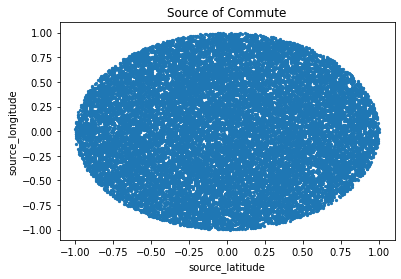

In [13]:
# Can we discern any information from lat long?
train_data_raw.plot.scatter(x='source_latitude', y='source_longitude', marker='.')
plt.title('Source of Commute');

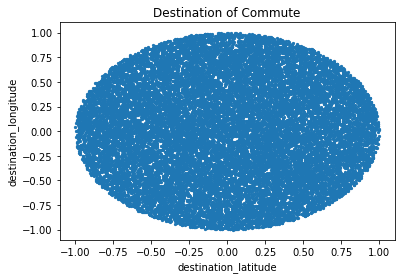

In [14]:
train_data_raw.plot.scatter(x='destination_latitude', y='destination_longitude', marker='.')
plt.title('Destination of Commute');

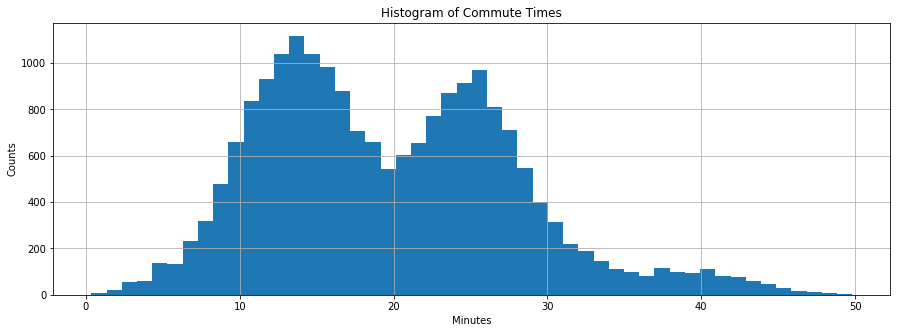

In [15]:
# This will show the distribution of commute times.
plt.figure(figsize=(15,5))
train_data_raw['commute_time'].hist(bins=50)
plt.title('Histogram of Commute Times')
plt.xlabel('Minutes')
plt.ylabel('Counts');

In [16]:
# How about a table showing commuters of each type?
train_data_raw.groupby('commute_type').size()

commute_type
BIKE     3008
BUS      6453
CAR      6995
TRAIN    2498
WALK     1046
dtype: int64

This is a nice summary table, but let's graph this out somehow.

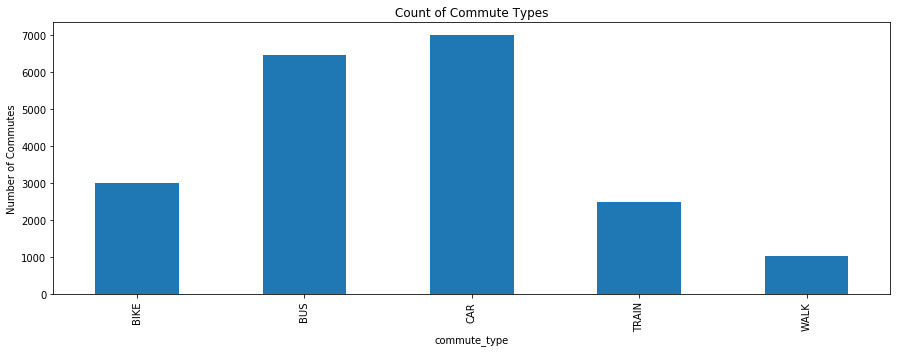

In [17]:
plt.figure(figsize=(15,5))
train_data_raw.groupby('commute_type').size().plot(kind='bar')
plt.title('Count of Commute Types')
plt.ylabel('Number of Commutes');

What can you say about the data based on these graphs?

__________
Notes (markdown):

In [ ]:
# Scratch area (code)

## A Touch of Feature Transformation

The current dtype of `time_of_day_ts` is not great for graphing. It might be a good idea to do something about it. 

### FIXME: Why isn't it great for graphing? What are we going to do?

In [1]:
# This function converts this into a decimal between zero and twenty-four.

def timestamp_to_decimal(ts):
    """Convert a timestamp datum into a decimal between zero and twenty-four.
    
    Parameters
    ----------
    ts: pd.Series of datetime.
    """
    return ts.dt.hour + (1/60)*ts.dt.minute

In [6]:
# Let's use our new function on the data and create a new column. Notice that the function is being used to transform 
# both the training AND testing datasets.
train_data_raw['time_of_day'] = timestamp_to_decimal(
    train_data_raw['time_of_day_ts'])
test_data_raw['time_of_day'] = timestamp_to_decimal(
    test_data_raw['time_of_day_ts'])

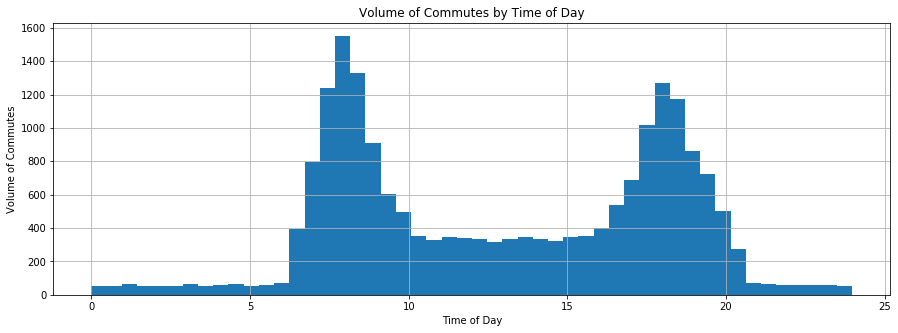

In [20]:
# Now that time of day is represented by a number from 0 to 24, let's see how many trips are being made throughout 
# the day.
plt.figure(figsize=(15,5))
train_data_raw['time_of_day'].hist(bins=50)
plt.title('Volume of Commutes by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Volume of Commutes');

__________
Notes (markdown):

In [ ]:
# Scratch area (code)

## A Touch of Feature Engineering

### FIXME: link to concepts feature transformation

We have visualized certain variables included in the dataset and noted how sometimes variables need to be transformed before they can be graphed in a meaningful way. 

We've looked at locations, commute types, commute times, time of day. The dataset contains information we can use to generate new features. 

Let's revisit location data because with a source and a destination, we can calculate distance.

![dist_image](https://slideplayer.com/slide/4829376/15/images/8/Some+Euclidean+Distances.jpg "Euclidean")

### FIXME: Need more descriptive text of what is going on here

In [21]:
# Euclidean distance is also known as L2.
def euclidean_distance(source_x, source_y, target_x, target_y):
    return np.sqrt((source_x - target_x)**2 + (source_y - target_y)**2)

# Manhattan (or taxicab) distance is also known as L1.
def manhattan_distance(source_x, source_y, target_x, target_y):
    return np.abs(source_x - target_x) + np.abs(source_y - target_y)

In [23]:
train_data_raw['euclidean_distance'] = euclidean_distance(
    train_data_raw['source_latitude'], train_data_raw['source_longitude'],
    train_data_raw['destination_latitude'], train_data_raw['destination_longitude'])
test_data_raw['euclidean_distance'] = euclidean_distance(
    test_data_raw['source_latitude'], test_data_raw['source_longitude'],
    test_data_raw['destination_latitude'], test_data_raw['destination_longitude'])

train_data_raw['manhattan_distance'] = manhattan_distance(
    train_data_raw['source_latitude'], train_data_raw['source_longitude'],
    train_data_raw['destination_latitude'], train_data_raw['destination_longitude'])
test_data_raw['manhattan_distance'] = manhattan_distance(
    test_data_raw['source_latitude'], test_data_raw['source_longitude'],
    test_data_raw['destination_latitude'], test_data_raw['destination_longitude'])

__________
Notes (markdown):

In [ ]:
# Scratch area (code)

### Challenge:
##### The code above was a lot to read and pretty repetitious.
##### We've mentioned the idea of avoiding repeated code where possible, particularly to avoid errors that pop up when making the same edit in multiple places.
##### What could we do to avoid having to type the same code multiple times?

### FIXME: Need solutions to this challenge

In [24]:
# Use this template to start if you want. 
# The docstring format below is one common convention.
# There are other good conventions represented elsewhere in FH materials.
# None of these is exactly right or wrong, but the important things are consistency and clarity.
def create_distance_features(df):
    """Describe what the function does here.
    
    Parameters
    ----------
    df: Important notes about our argument df here.
    """
    pass
# I've included a possible solution near the bottom of the document.

__________
Notes (markdown):

In [ ]:
# Scratch area (code)

#### Let's look at the counts for different distances using our new distance features.

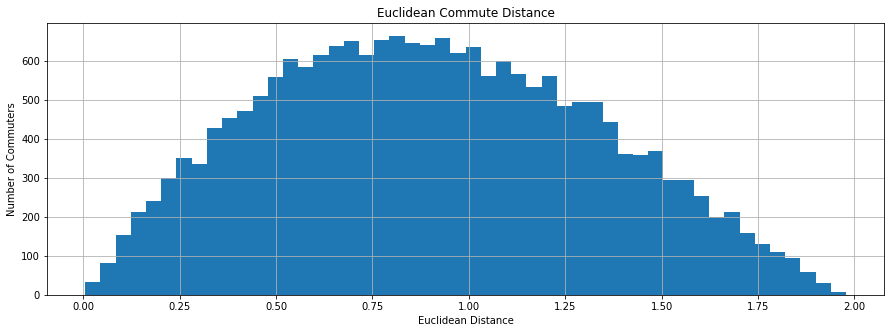

In [25]:
plt.figure(figsize=(15,5))
train_data_raw['euclidean_distance'].hist(bins=50)
plt.title('Euclidean Commute Distance')
plt.xlabel('Euclidean Distance')
plt.ylabel('Number of Commuters');

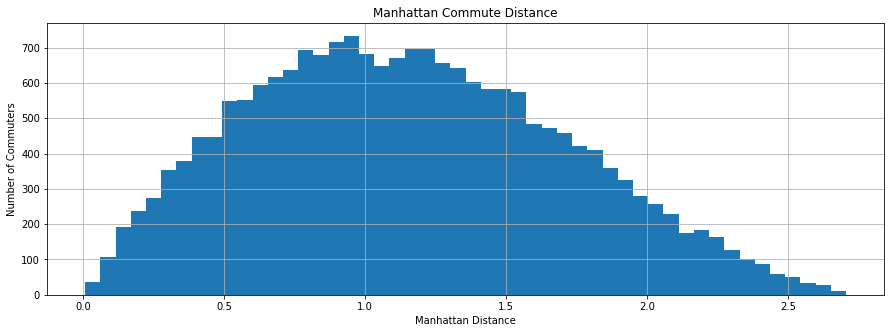

In [26]:
plt.figure(figsize=(15,5))
train_data_raw['manhattan_distance'].hist(bins=50)
plt.title('Manhattan Commute Distance')
plt.xlabel('Manhattan Distance')
plt.ylabel('Number of Commuters');

Now that we have some information about distance, do you have a guess for which type is related to commute time? 

### FIXME: which type is related to commute time? Why is this important?

__________
Notes (markdown):

In [ ]:
# Scratch area (code)

## MOAR features
### At this point, we have done some feature engineering with numerical (continuous) data. What do you do with categorical data?

### FIXME: Change title to 'Categorical feature engineering'?

In [27]:
# The computer can't typically make sense of 'BIKE', 'CAR', etc, but it does understand 
# 0 and 1 and combinations of those digits.
# Each of these combinations can be referred to as a level or category of a particular feature.
# Why does it make sense to leave one (level) out? By process of elimination, if a datapoint isn't 
# one of the n-1 levels, it must be the nth.

def create_indicator_features(feature, leave_one_out=True):
    # Sort the levels so we always get the same ordering of new features.
    levels = list(sorted(np.unique(feature)))
    # If we need to leave one out to avoid identifiability issues, we will 
    # leave out the *last* level, in sorted order.
    if leave_one_out:
        levels = levels[:-1]
    indicator_features = []
    for level in levels:
        indicator_feature = (feature == level)
        indicator_feature_name = "is_{0}".format(level)
        indicator_features.append(
            pd.Series(indicator_feature, 
                      name=indicator_feature_name, 
                      index=feature.index,
                      dtype=int))
    return pd.concat(indicator_features, axis=1)

In [29]:
commute_type_features_train = create_indicator_features(train_data_raw['commute_type'])
commute_type_features_test = create_indicator_features(test_data_raw['commute_type'])

commute_type_features_train.head(10)

,is_BIKE,is_BUS,is_CAR,is_TRAIN
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,0,0,1
5,0,0,0,1
6,0,1,0,0
7,1,0,0,0
8,0,0,0,0
9,0,1,0,0


In [2]:
# Drop unnecessary columns before moving on.
train_data_raw = train_data_raw.drop(['time_of_day_ts', 'commute_type'], axis=1)
test_data_raw = test_data_raw.drop(['time_of_day_ts', 'commute_type'], axis=1)

NameError: name 'train_data_raw' is not defined

In [31]:
# Combine our new indicator variables to the original dataframes.
train_data_processed = pd.concat([train_data_raw, commute_type_features_train], axis=1)
test_data_processed = pd.concat([test_data_raw, commute_type_features_test], axis=1)

In [32]:
# Save our processed data to a directory
train_data_processed.to_csv('../data/train_data_processed.csv')
test_data_processed.to_csv('../data/test_data_processed.csv')

__________
Notes (markdown):

In [ ]:
# Scratch area (code)

## A bit more practice with some python ideas: 
* Defining functions, using for loops, simplifying your life...

A possible solution to one of the questions above. Did yours look something like this?

In [ ]:
def create_distance_features(df):
    """Add 'euclidean_distance' and 'manhattan_distance' feaures to a DataFrame.
    
    Parameters
    ----------
    df: pd.Dataframe with features 'source_latitude', 'source_longitude', 'destination_latitude', 
    and 'destination_longitude'.
    """
    coordinates = [df['source_latitude'], df['source_longitude'], 
                   df['destination_latitude'], df['destination_longitude']]
    df['euclidean_distance'] = euclidean_distance(coordinates)
    df['manhattan_distance'] = manhattan_distance(coordinates)
    return df

__________
Notes (markdown):

In [ ]:
# Scratch area (code)

### FIXME: What is the purpose of the section below?

## Even more practice with python ideas:
* Using classes to maintain desired behavior within pipelines...

Later on, we'll want the ability to include our functions in a workflow to transform data in a consistent way, particularly when performing transformations separately on the **train** and **test** partitions of a dataset. It's common maintain control of inputs and outputs by writing a wrapper function to call functions in a specific order. 

Another good way to maintain consistent control is to write classes that perform the necessary work while integrating nicely with existing pipeline elements, such as those from scikit-learn.

Earlier, we defined the *function* `create_indicator_features` to allow us to convert a single categorical variable into a number of binary indicator features (sometimes called dummy variables) for the different levels/categories in the original column.

The code below is from an early attempt to create a version of `pandas.get_dummies` that maintains the **ordering** of our new features regardless of differences in levels for **train** and **test** sets. I chose to write it as a *class* in order to integrate more easily with pipelines calling the `fit` and `transform` methods found throughout `scikit-learn`.

In [ ]:
#import numpy as np
#import pandas as pd


class DummyMaker:
    """Class takes a categorical variable and returns a DataFrame with a column
    for each category having values of 0 or 1 for each row.
    A string passed to the constructor will become a prefix for dummy
    column names.
    """

    def __init__(self, prefix=None):
        self.levels = None
        if prefix is None:
            self.prefix = ""
        else:
            self.prefix = prefix + "__"
        self.colnames = None

    def fit(self, categorical_column):
        """Store the levels from categorical_column, a pd.Series (df[colname]).
        unique_cats is a list of unique categories in that column.
        self.colnames creates dummy column names with optional prefix.
        """
        unique_cats = np.unique(categorical_column)
        self.levels = unique_cats
        self.colnames = [self.prefix + level.replace(" ", "_")
                         for level in self.levels]

    def transform(self, categorical_column, k_minus_one=False):
        """If k_minus_one=True, the column representing the first unique category
        is dropped.
        The indexing of categorical_column is preserved in the new DataFrame.
        """
        num_rows = len(categorical_column)
        num_features = len(self.levels)
        dummies = np.zeros(shape=(num_rows, num_features))
        for i, value in enumerate(self.levels):
            dummies[:, i] = (categorical_column == value).astype(int)
        if k_minus_one == True:
            return pd.DataFrame(dummies[:, 1:], columns=self.colnames[1:],
                                index=categorical_column.index)
        else:
            return pd.DataFrame(dummies, columns=self.colnames,
                                index=categorical_column.index)

### FIXME: Need challenge solutions

### Challenge:
##### Do any issues pop out that might arise from the use of the above code in a production environment?
##### How could you improve the above code to avoid those issues?
##### Could you write a series of tests that would allow you to assess whether the above code functions properly in all the important cases?
##### How would you go about writing your own version of a dummy/indicator variable maker?

__________
Notes (markdown):

In [ ]:
# Scratch area (code)